In [15]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_DATA",one_hot = True)
    
    

Extracting MNIST_DATA/train-images-idx3-ubyte.gz
Extracting MNIST_DATA/train-labels-idx1-ubyte.gz
Extracting MNIST_DATA/t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA/t10k-labels-idx1-ubyte.gz


### 穿插一点小知识:
matplotlib具有图像页内显示的功能,比较好用,我习惯性采用它来显示图片.
但是,matplotlib显示的图像颜色与原图不同,整体呈蓝色.后来网上搜索后才知道，对于opencv的像素是BGR顺序，然而matplotlib所遵循的是RGB顺序。
opencv的一个像素为：[B,G,R] ,matplotlib的一个像素为：[R,G,B]。这就是为什么本来发红的区域变得有些发蓝了。
因此需要进行颜色空间的转换.

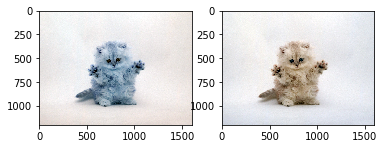

In [14]:
img1 = cv2.imread("/home/chocolate/111/837106580837651340.jpg")
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
# 创建两个子图,121表示:一行两列,在第一个子图中显示
plt.subplot(121)
plt.imshow(img1)
plt.subplot(122)
plt.imshow(img2)
plt.show()

### 同样的,灰度图像也需要进行格式转变:
mnist数据集为28*28的灰度图片.
matplotlib有自带的灰度图显示功能,设置cmap='gray'即可.
另外,cmap有多种格式可供选择.如下所示

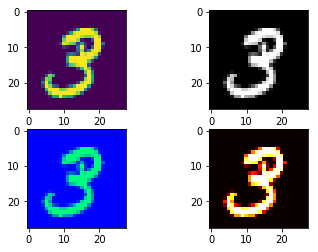

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
3


In [33]:
img1 = np.reshape(mnist.train.images[1],[28,28])    #mnist每个图像是1*784的矩阵,若要显示出来需要转化为28*28的矩阵
plt.subplot(221)
plt.imshow(img1)
plt.subplot(222)
plt.imshow(img1,cmap = 'gray')
plt.subplot(223)
plt.imshow(img1,cmap = 'winter')
plt.subplot(224)
plt.imshow(img1,cmap = 'hot')
plt.show()

print mnist.train.labels[1]                  #输出对应的标签值.标签是1*10的矩阵
print np.argmax(mnist.train.labels[1])       #利用argmax函数输出1对应的位置,即实际标签

In [44]:
# 创建会话.后续过程都在该会话中进行
sess = tf.InteractiveSession()

# 输入数据的占位符,None表示不限条数的输入,每条数据的特征为784维
x = tf.placeholder(tf.float32,[None,784])
# 权值参数.与placeholder不同的是,placeholder的张量一旦使用掉就会消失;而Variable的张量始终存在,在每轮迭代中进行更新.
# 此处可将权值初始化为0.但在深度网络中,初始化常常是非常重要的.
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))

# 该模型只用一个简单的Softmax Regression算法实现,实现公式为:y=softmax(Wx+b).只需一行代码即可搞定
y = tf.nn.softmax(tf.matmul(x,W) + b)

# 定义loss函数.优化的目标是使该函数值尽量减小.使用常用的交叉熵作为损失函数.设置y_即真正的label值,用来计算交叉熵
y_ = tf.placeholder(tf.float32,[None,10])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y, y_))

# 设置优化算法.选用常用的随机梯度下降SGD方法.
learning_rate = 0.5
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# 全局参数初始化
tf.global_variables_initializer().run()

# 设置准确率函数.当预测值与实际值相同时,即为分类准确.然后求整体的准确率
correct_pred = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
acc = tf.reduce_mean(tf.cast(correct_pred,tf.float32))

# 喂参数,开始训练.每次随机抽取100条样本进行训练,共迭代1000次.注意:输入的y值是真实标签,应当是y_!y是输出值
for i in range(10000):
    batch_x, batch_y = mnist.train.next_batch(100)
    optimizer.run({x:batch_x,y_:batch_y})

    
    print "迭代"+ str(i) + "次,训练准确率为:" + str(acc.eval({x:batch_x,y_:batch_y}))
    
#     如上的run()操作也可写为:sess.run(optimizer,feed_dict={x:batch_x,y_:batch_y})
#                        与:sess.run(acc,feed_dict={x:batch_x,y_:batch_y})
#     这样看起来更清晰.在执行算法定义的代码时,计算并没有发生.只有调用run方法并feed数据时才真正执行.


print "整体测试准确率为:" + str(acc.eval({x:mnist.test.images,y_:mnist.test.labels}))
    


迭代0次,训练准确率为:0.57
迭代1次,训练准确率为:0.58
迭代2次,训练准确率为:0.6
迭代3次,训练准确率为:0.56
迭代4次,训练准确率为:0.48
迭代5次,训练准确率为:0.42
迭代6次,训练准确率为:0.44
迭代7次,训练准确率为:0.5
迭代8次,训练准确率为:0.51
迭代9次,训练准确率为:0.51
迭代10次,训练准确率为:0.47
迭代11次,训练准确率为:0.61
迭代12次,训练准确率为:0.54
迭代13次,训练准确率为:0.63
迭代14次,训练准确率为:0.66
迭代15次,训练准确率为:0.59
迭代16次,训练准确率为:0.59
迭代17次,训练准确率为:0.76
迭代18次,训练准确率为:0.65
迭代19次,训练准确率为:0.68
迭代20次,训练准确率为:0.67
迭代21次,训练准确率为:0.71
迭代22次,训练准确率为:0.66
迭代23次,训练准确率为:0.69
迭代24次,训练准确率为:0.71
迭代25次,训练准确率为:0.78
迭代26次,训练准确率为:0.67
迭代27次,训练准确率为:0.78
迭代28次,训练准确率为:0.71
迭代29次,训练准确率为:0.74
迭代30次,训练准确率为:0.73
迭代31次,训练准确率为:0.64
迭代32次,训练准确率为:0.64
迭代33次,训练准确率为:0.73
迭代34次,训练准确率为:0.69
迭代35次,训练准确率为:0.67
迭代36次,训练准确率为:0.67
迭代37次,训练准确率为:0.7
迭代38次,训练准确率为:0.72
迭代39次,训练准确率为:0.74
迭代40次,训练准确率为:0.71
迭代41次,训练准确率为:0.73
迭代42次,训练准确率为:0.78
迭代43次,训练准确率为:0.73
迭代44次,训练准确率为:0.73
迭代45次,训练准确率为:0.75
迭代46次,训练准确率为:0.72
迭代47次,训练准确率为:0.81
迭代48次,训练准确率为:0.72
迭代49次,训练准确率为:0.76
迭代50次,训练准确率为:0.66
迭代51次,训练准确率为:0.71
迭代52次,训练准确率为:0.66
迭代53次,训练准确率为:0.68
迭代54次,训练准确率为:0.73
迭代55次,训练准确率为:0.74
迭代56次